<a href="https://colab.research.google.com/github/AbnerMacedo/data_science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Science**
*by Abner Macedo*

---

# Análise dos Dados do Airbnb - **Rio de Janeiro**

O [Airbnb](https://www.airbnb.com.br/) se consolidou como a  **maior empresa hoteleira do mundo**. mesmo sem possuir um único **hotel**.

A plataforma conecta viajantes em busca de hospedagem a anfitriões que desejam alugar seus imóveis de forma prática e inovadora.

Desde sua fundação, em 2008, o Airbnb já  **hospedou mais de 300 milhões de pessoas globalmente**, desafiando as redes hoteleiras tradicionais.

Uma de suas iniciativas é a disponibilização de dados sobre suas operações nas principais cidades do mundo, permitindo que desenvolvedores e analistas criem projetos e soluções em ciência de dados. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste notebook, iremos analisar os dados referentes ao estado do Rio de Janeiro, que é um dos destinos com o maior número de acomodações de alta qualidade do mundo.**

In [ ]:
# importando os pacotes utilizados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# importando o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2024-06-27/visualisations/listings.csv')

## Análisando os dados dispostos na tabela


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias


In [ ]:
# Analisando as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,310.0,5,319,2024-06-08,1.88,1,274,23,NaN
1,220377,Suíte Casal (banheiro privativo),1142424,Taciana,NaN,Tijuca,-22.92880,-43.24046,Private room,220.0,1,5,2024-03-28,0.03,3,283,1,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,203.0,2,291,2024-06-02,1.70,1,241,23,NaN
3,35764,COPACABANA SEA BREEZE - RIO - 25 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,201.0,3,476,2024-06-25,2.85,1,93,36,NaN
4,223073,Modern Loft 1 • Ipanema Posto 9 • 500 mb,503995,❤️ BrUx ❤️,NaN,Ipanema,-22.98280,-43.20467,Entire home/apt,321.0,1,471,2024-06-02,3.04,7,348,17,NaN


### **1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas: \t {}" .format(df.shape[0]))
print("Variáveis: \t {}\n" .format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 	 34664
Variáveis: 	 18



,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
license,1.000000
neighbourhood_group,1.000000
reviews_per_month,0.243653
last_review,0.243653
price,0.028041
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
name,0.000000


### **3. Qual o tipo de distribuição das variáveis?**

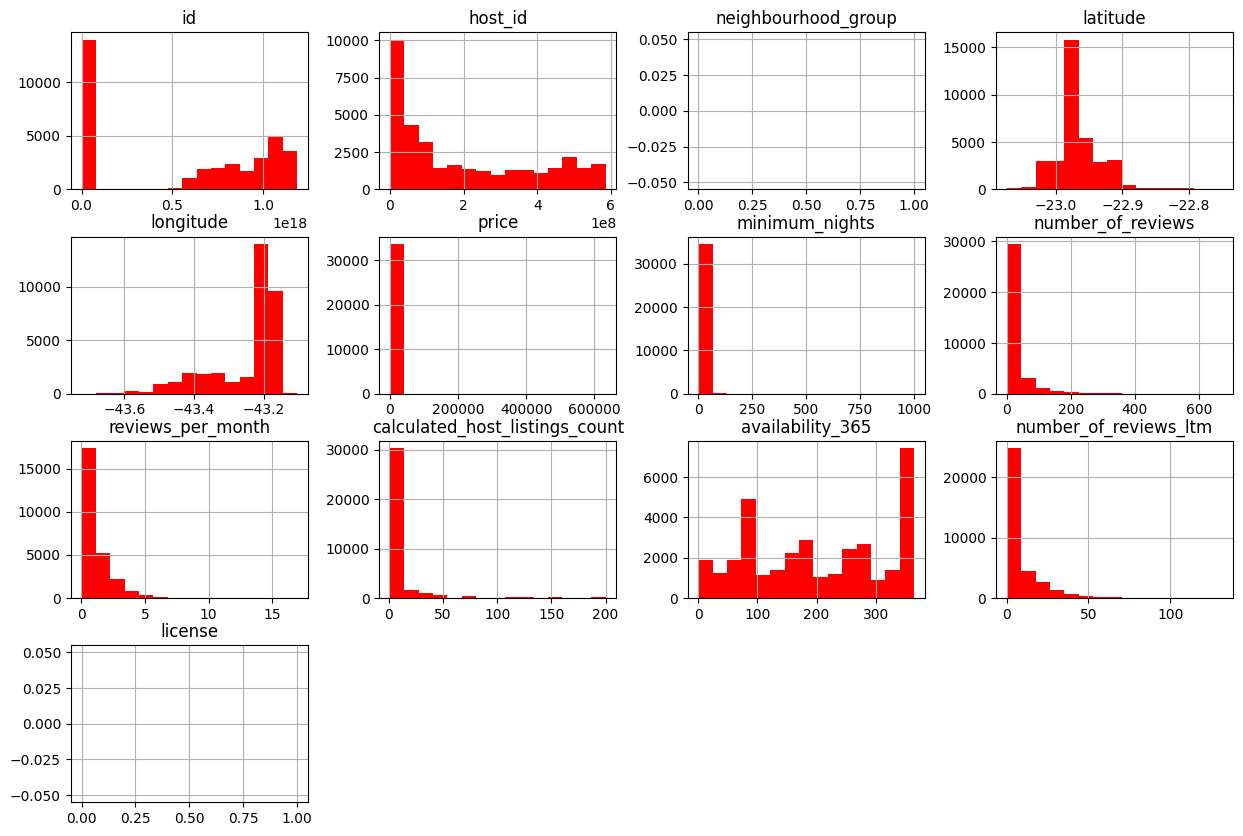

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, color='red', figsize=(15,10));

### **4. Há outliers?**

In [ ]:
# resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,33692.000000,34664.000000,34664.000000,26218.000000,34664.000000,34664.000000
mean,731.188235,3.683360,22.303658,1.086423,9.070909,203.164695
std,5667.250477,14.203589,44.086305,1.195325,24.042257,116.524265
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,199.000000,1.000000,1.000000,0.230000,1.000000,90.000000
50%,307.000000,2.000000,5.000000,0.670000,2.000000,190.000000
75%,572.000000,3.000000,24.000000,1.540000,5.000000,320.000000
max,633125.000000,1000.000000,674.000000,16.960000,200.000000,365.000000


Analisando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 572, porém seu valor máximo é 633125.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### **Boxplot para minimum_nights**

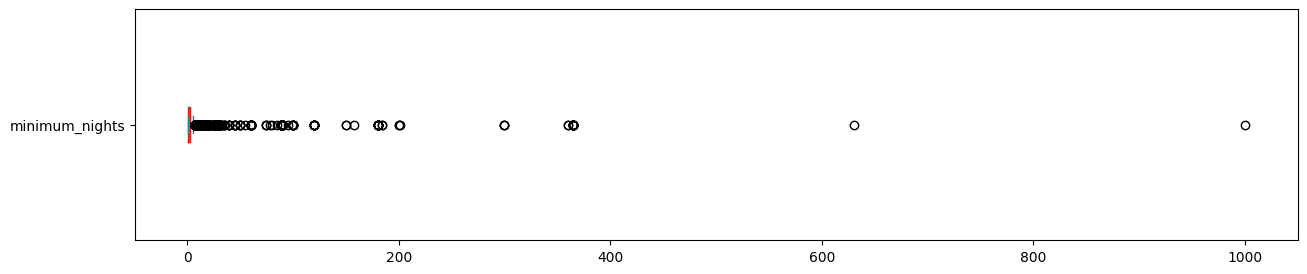

minimum_nights: valores acima de 30:
198 entradas
0.5712%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3), boxprops=dict(color='red'))
plt.show()

# quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### **Boxplot para price**

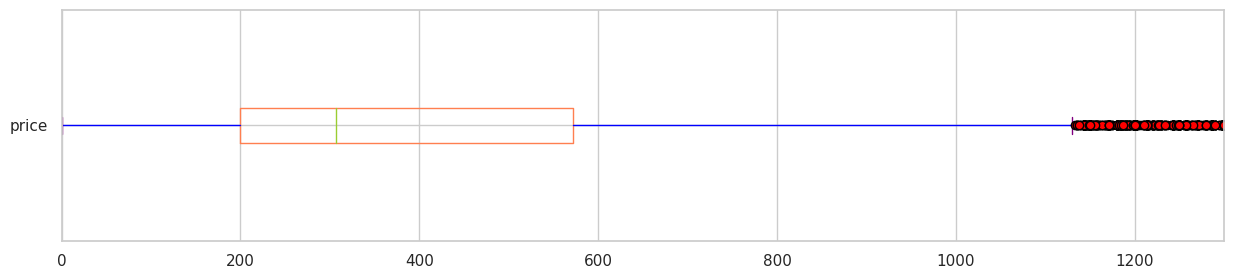


price: valores acima de 2500
1142 entradas
3.2945%


In [ ]:
# Estilo
sns.set(style="whitegrid")

# price
plt.figure(figsize=(15, 3))
box = df.price.plot(kind='box', vert=False, xlim=(0, 1300),
                     boxprops=dict(color='coral'),
                     medianprops=dict(color='yellowgreen'),
                     whiskerprops=dict(color='blue'),
                     capprops=dict(color='purple'),
                     flierprops=dict(markerfacecolor='red', marker='o')) #outliers
plt.grid(True)
plt.show()

# quantidade de valores acima de 2500 para price
print("\nprice: valores acima de 2500")
print("{} entradas".format(len(df[df.price > 2500])))
print("{:.4f}%".format((len(df[df.price > 2500]) / df.shape[0]) * 100))

#### **Histogramas sem *outliers***

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos limpar o *DataFrame* e plotar novamente o histograma.

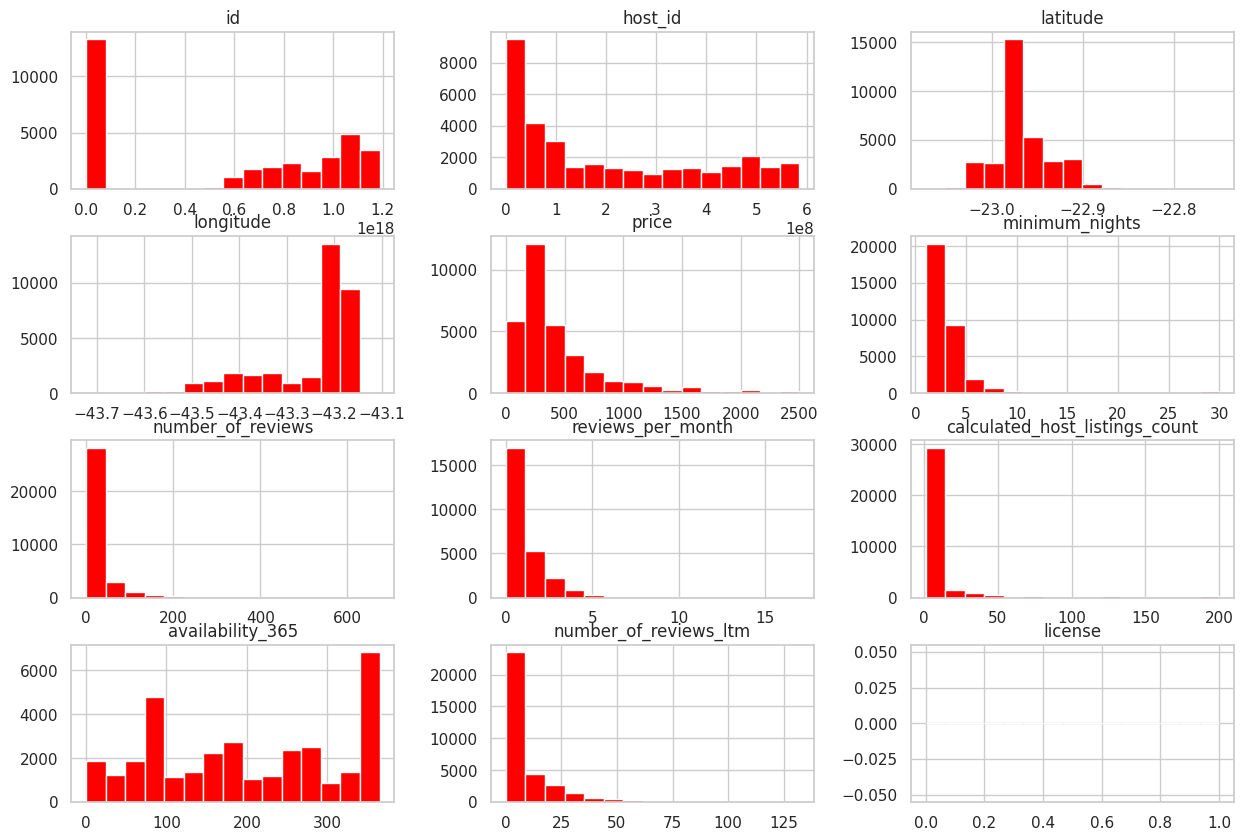

In [ ]:
# remover os outliers em um novo dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover 'neighbourhood_group', está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, color='red', figsize=(15,10));

### **5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.119302,-0.144810,-0.194905,0.038071,0.128352
minimum_nights,0.119302,1.000000,-0.052963,-0.146054,-0.021838,-0.016119
number_of_reviews,-0.144810,-0.052963,1.000000,0.468151,-0.023305,-0.110463
reviews_per_month,-0.194905,-0.146054,0.468151,1.000000,0.017243,-0.141841
calculated_host_listings_count,0.038071,-0.021838,-0.023305,0.017243,1.000000,0.051600
availability_365,0.128352,-0.016119,-0.110463,-0.141841,0.051600,1.000000


<Axes: >

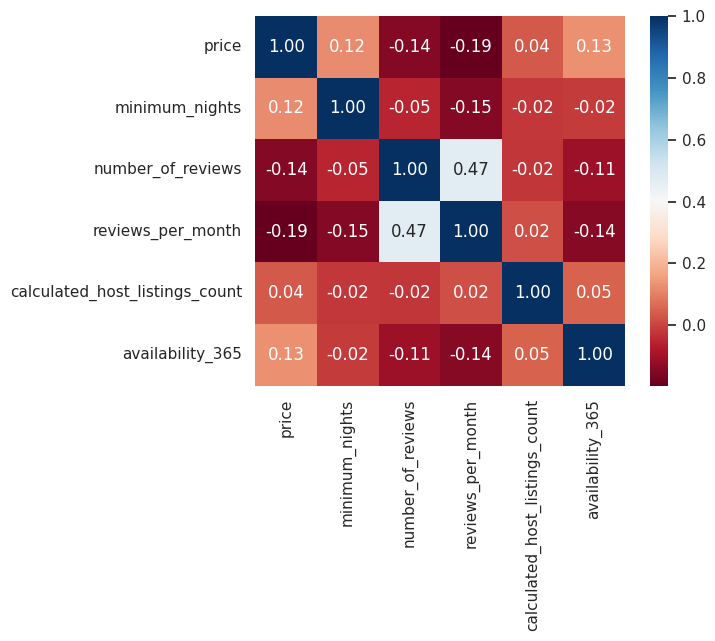

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor= 'white', annot=True)

### **6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# analisar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

,count
room_type,
Entire home/apt,26163
Private room,6559
Shared room,597
Hotel room,25


In [ ]:
# analisar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

,count
room_type,
Entire home/apt,0.784639
Private room,0.196707
Shared room,0.017904
Hotel room,0.000750


### **7. Qual é a localidade mais cara do Rio?**

---



Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

,price
neighbourhood,
Galeão,1312.500000
Joá,832.060000
São Conrado,779.220532
Leblon,653.775688
Lagoa,641.327434
Ipanema,606.045872
Praia da Bandeira,600.000000
Itanhangá,592.474453
Guaratiba,589.324786


Ao analisar o preço médio por bairro, podem surgir diversas outras perguntas. Uma delas poderia ser por que o bairro Guaratiba está presente nesse top 10. Isso ocorre por diversas razões:

Primeiro, Guaratiba atrai visitantes em busca de um refúgio tranquilo, longe da agitação das áreas urbanas. Sua proximidade com a Lagoa de Guaratiba e as praias menos conhecidas oferece opções de ecoturismo e lazer na natureza.

Além disso, quem nunca ouviu falar da culinária local, com restaurantes que servem especialmente frutos do mar? Outro ponto a favor de Guaratiba é a Pedra do Telégrafo, um popular destino de trilhas que proporciona vistas espetaculares, tornando-se um atrativo tanto para os amantes de aventura quanto para os que buscam fotografias memoráveis

In [ ]:
# plotar os imóveis pela latitude-longitude
print(df_clean[df_clean.neighbourhood == "Guaratiba"].shape)

# analisar as 3 entradas de guaratiba
df_clean[df_clean.neighbourhood == "Guaratiba"].head(3)

(117, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1078,2371038,Pernoite em Suíte Master ou locação para evento.,8140796,Alexandre,Guaratiba,-22.98317,-43.55682,Entire home/apt,500.0,1,7,2016-07-04,0.06,1,178,0,NaN
1268,2730094,Mata Atlantica Barra de Guaratiba,11268009,Lilian,Guaratiba,-23.03377,-43.56285,Entire home/apt,1186.0,1,59,2024-03-31,0.56,3,355,6,NaN
1722,3316664,Casa em Guaratiba 1500 m² muito verde e segurança,15489992,Rodrigo,Guaratiba,-22.97404,-43.58949,Shared room,500.0,5,0,NaN,NaN,3,358,0,NaN


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

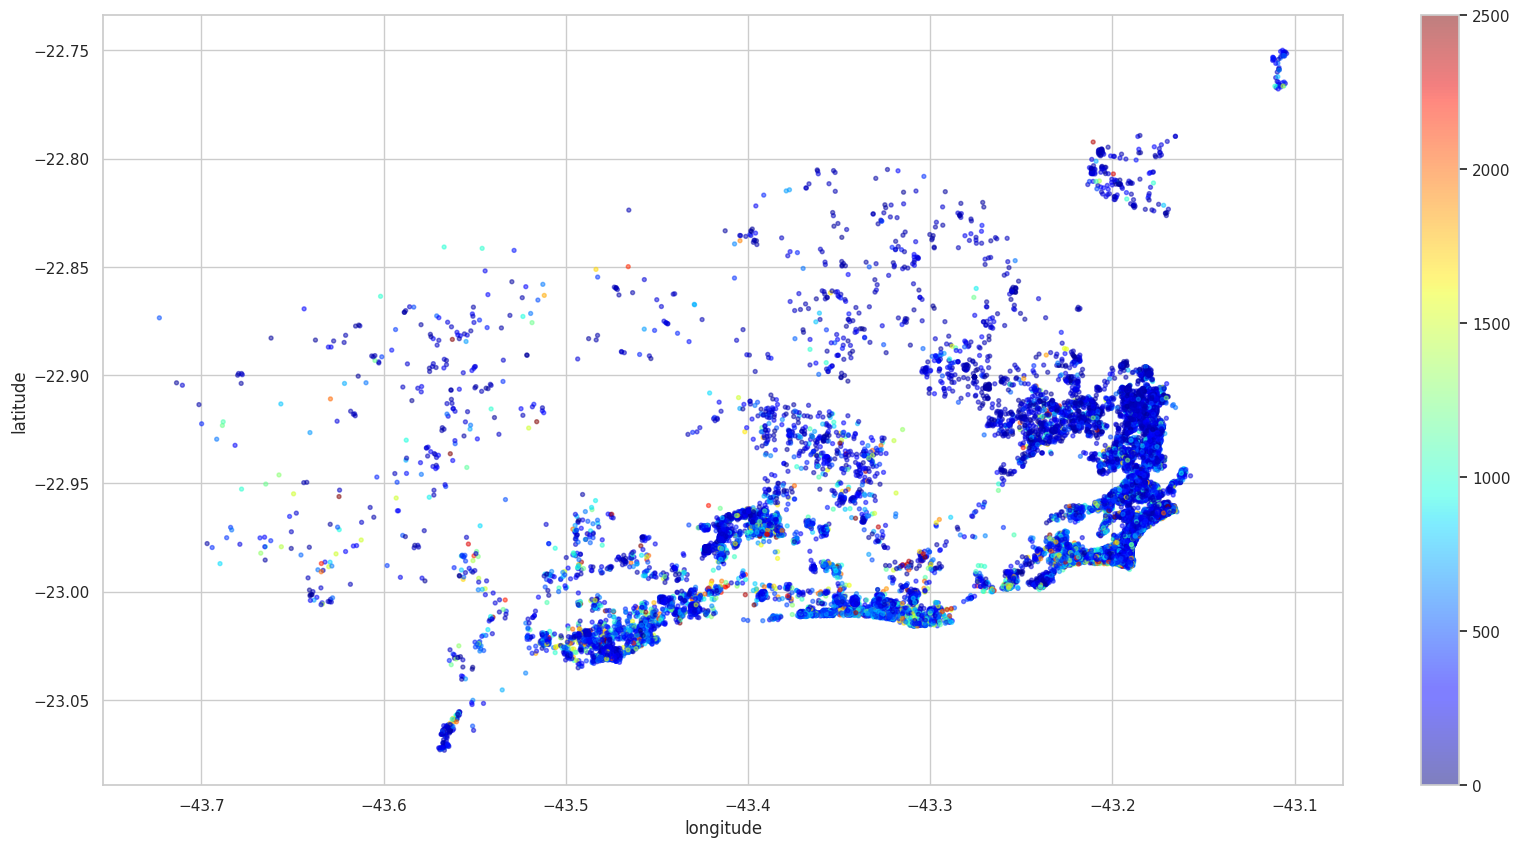

In [ ]:
# Plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(20,10));

## Conclusões


A análise dos dados do **Airbnb** no Rio de Janeiro ilustra um ecossistema de hospedagem dinâmico e multifacetado, onde a combinação de fatores como tipo de *imóvel*, *localização* e *reputação* do anfitrião desempenham papéis cruciais na experiência do viajante. Para anfitriões e investidores, essas informações são valiosas para otimizar **ofertas e estratégias de precificação**, enquanto os turistas podem usar esses dados para encontrar a hospedagem que melhor atenda às suas necessidades e expectativas.